<a href="https://colab.research.google.com/github/filipemtz/neuralnets/blob/main/mlp_mnist_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Perceptron (MLP) para Reconhecimento de Digitos

Exemplo mostrando como treinar uma rede neural do tipo multilayer perceptron (MLP) para reconhecimento de digitos manuscritos usando a base de dados MNIST e a biblioteca tensorflow. O exemplo completamente baseado no tutorial acessível no link abaixo disponível no site do tensorflow. 

https://www.tensorflow.org/tutorials/load_data/numpy?hl=pt-br

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import tensorflow as tf

DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
  trainval_examples = data['x_train']
  trainval_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

print(trainval_examples.shape, trainval_examples.dtype)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) uint8


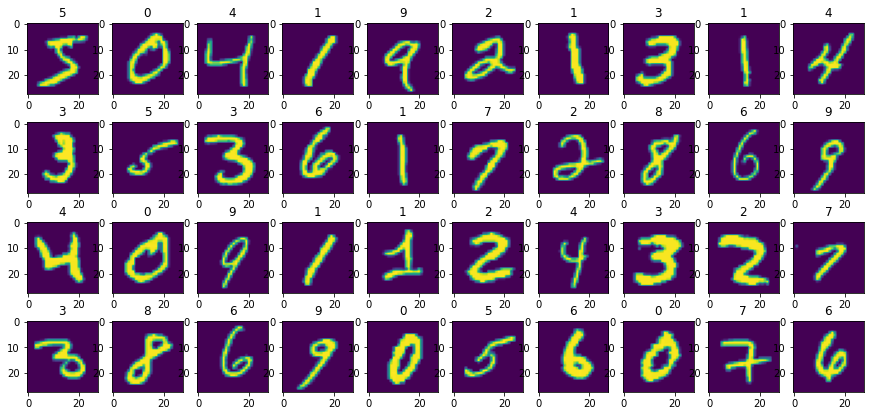

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.figure(figsize=(15, 7))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.title(str(trainval_labels[i]))
  plt.imshow(trainval_examples[i])



# Shuffle 

https://www.tensorflow.org/api_docs/python/tf/data/Dataset#:~:text=Randomly%20shuffles%20the,1%2C000%20element%20buffer.

Randomly shuffles the elements of this dataset.

This dataset fills a buffer with buffer_size elements, then randomly samples elements from this buffer, replacing the selected elements with new elements. For perfect shuffling, a buffer size greater than or equal to the full size of the dataset is required.

For instance, if your dataset contains 10,000 elements but buffer_size is set to 1,000, then shuffle will initially select a random element from only the first 1,000 elements in the buffer. Once an element is selected, its space in the buffer is replaced by the next (i.e. 1,001-st) element, maintaining the 1,000 element buffer.




In [ ]:
import tensorflow as tf 

trainval_dataset = tf.data.Dataset.from_tensor_slices((trainval_examples, trainval_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

BATCH_SIZE = 2048
SHUFFLE_BUFFER_SIZE = 4096

train_size = int(trainval_examples.shape[0] * 0.8)
val_size = trainval_examples.shape[0] - train_size

trainval_dataset = trainval_dataset.shuffle(SHUFFLE_BUFFER_SIZE) 

test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_dataset = trainval_dataset.take(train_size).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = trainval_dataset.skip(train_size).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print(train_dataset)

<PrefetchDataset shapes: ((None, 28, 28), (None,)), types: (tf.uint8, tf.uint8)>


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

history = model.fit(train_dataset, epochs=50, validation_data=val_dataset)

Epoch 1/50
24/24 [==============================] - 3s 20ms/step - loss: 17.5073 - sparse_categorical_accuracy: 0.6145 - val_loss: 3.6633 - val_sparse_categorical_accuracy: 0.8345
Epoch 2/50
24/24 [==============================] - 0s 13ms/step - loss: 2.8242 - sparse_categorical_accuracy: 0.8530 - val_loss: 2.0031 - val_sparse_categorical_accuracy: 0.8776
Epoch 3/50
24/24 [==============================] - 0s 14ms/step - loss: 1.7126 - sparse_categorical_accuracy: 0.8866 - val_loss: 1.4584 - val_sparse_categorical_accuracy: 0.8944
Epoch 4/50
24/24 [==============================] - 0s 13ms/step - loss: 1.2330 - sparse_categorical_accuracy: 0.9020 - val_loss: 1.2015 - val_sparse_categorical_accuracy: 0.9047
Epoch 5/50
24/24 [==============================] - 0s 14ms/step - loss: 0.9339 - sparse_categorical_accuracy: 0.9174 - val_loss: 1.0535 - val_sparse_categorical_accuracy: 0.9132
Epoch 6/50
24/24 [==============================] - 0s 13ms/step - loss: 0.7373 - sparse_categorical_acc

Text(0.5, 1.0, 'accuracy')

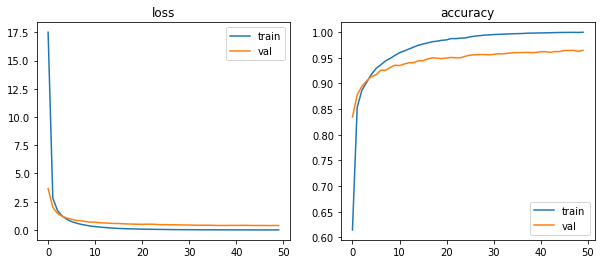

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.title("loss")

plt.subplot(1, 2, 2)
plt.plot(history.history['sparse_categorical_accuracy'], label='train')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val')
plt.legend()
plt.title("accuracy")


In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Accuracy: {accuracy:.2f}")

5/5 [==============================] - 0s 8ms/step - loss: 0.6371 - sparse_categorical_accuracy: 0.9434
Accuracy: 0.94


In [ ]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)
print(predictions.shape)

(2048, 10)


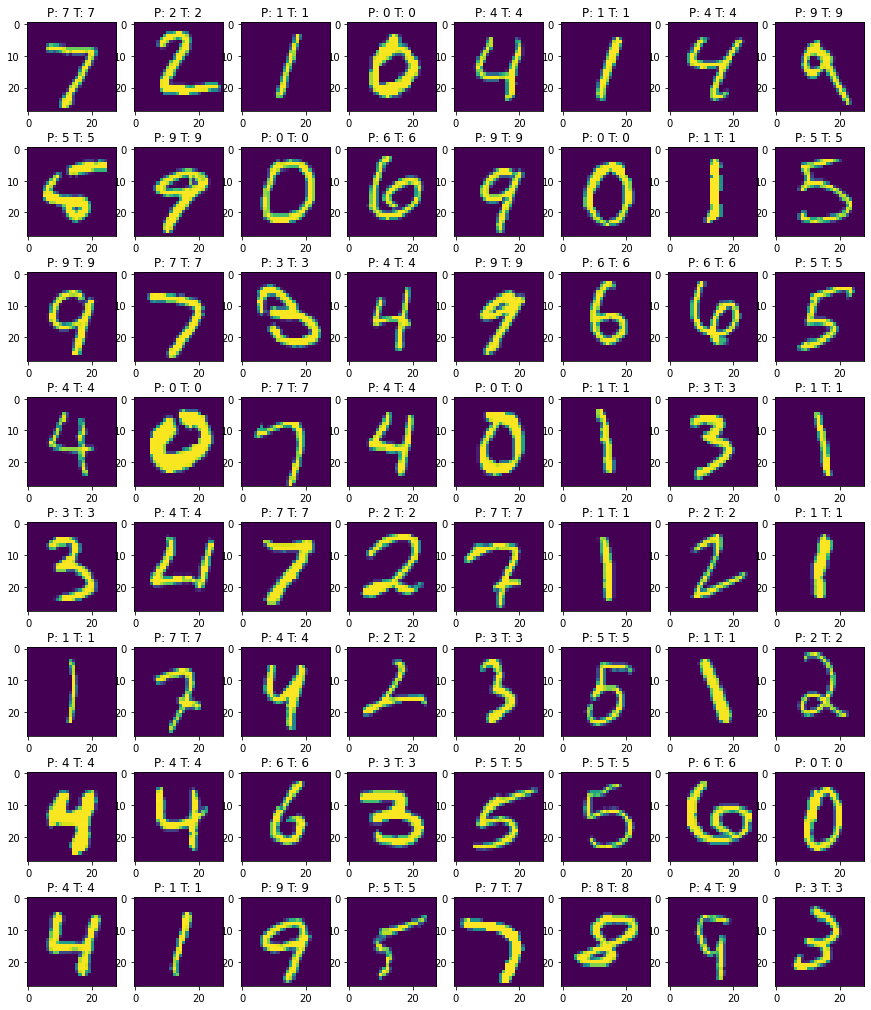

In [ ]:
plt.figure(figsize=(15, 18))
for i in range(64):
  plt.subplot(8, 8, i+1)
  cls = np.argmax(predictions[i])
  plt.title(f"P: {cls} T: {label_batch[i]}")
  plt.imshow(image_batch[i])